<a href="https://colab.research.google.com/github/KEMAL-MUDIE/CV/blob/main/Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

Should change runtime to have GPU Hardware accelerator: Runtime > Change runtime > Hardware accelerator: GPU.

In [ ]:
!python --version

Python 3.10.12


In [ ]:

import torch
print(torch.__version__)

2.1.0+cu121


In [ ]:
!python -m pip install \
'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-1i9o292m
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-1i9o292m
  Resolved https://github.com/facebookresearch/detectron2.git to commit e9f7e2ba15abd7badcb05ef6f5076f06b36a9c5b
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 16.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for detectron2: filename=detectron2-0.6-cp310-cp310-linux_x86_64.whl size=6119620 sha256=65dbe1eda6fe8e6e84eb2ce24dede

In [ ]:
!python --version

Python 3.10.12


In [ ]:
# check the available configuration files in model zoo
!sudo apt-get install tree
!tree /usr/local/lib/python3.9/dist-packages/detectron2/model_zoo

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tree is already the newest version (2.0.2-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/local/lib/python3.9/dist-packages/detectron2/model_zoo  [error opening dir]

0 directories, 0 files


# Get a predictor

In [ ]:
import detectron2
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
# Suppress some user warnings
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
# Select a model
config_file = "COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"
checkpoint_url = "COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"
# Create a configuration file
cfg = get_cfg()
config_file = model_zoo.get_config_file(config_file)
cfg.merge_from_file(config_file)
# Download weights
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(checkpoint_url)
score_thresh_test = 0.95
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = score_thresh_test
predictor = DefaultPredictor(cfg)

model_final_68b088.pkl: 421MB [00:02, 145MB/s]                           


# Perform inference

In [ ]:
!wget https://raw.githubusercontent.com/PacktPublishing/Hands-On-Computer-Vision-with-Detectron2/main/datasets/960x720image/input.jpg

--2024-01-06 22:42:37--  https://raw.githubusercontent.com/PacktPublishing/Hands-On-Computer-Vision-with-Detectron2/main/datasets/960x720image/input.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 107917 (105K) [image/jpeg]
Saving to: ‘input.jpg’

input.jpg           100%[===================>] 105.39K  --.-KB/s    in 0.02s   

2024-01-06 22:42:37 (5.10 MB/s) - ‘input.jpg’ saved [107917/107917]



In [ ]:
import cv2
input_url = "/content/WhatsApp Image 2023-06-13 at 12.12.45 PM.jpeg"
img = cv2.imread(input_url)
output = predictor(img)

In [ ]:
print(output)

{'instances': Instances(num_instances=4, image_height=673, image_width=667, fields=[pred_boxes: Boxes(tensor([[  7.4929, 197.8669, 209.5248, 652.7116],
        [197.9936, 204.6891, 399.4031, 665.3672],
        [431.9044, 125.6865, 650.5228, 651.7631],
        [309.0960, 258.8144, 520.3705, 659.7556]], device='cuda:0')), scores: tensor([0.9989, 0.9987, 0.9972, 0.9966], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


# Visualization

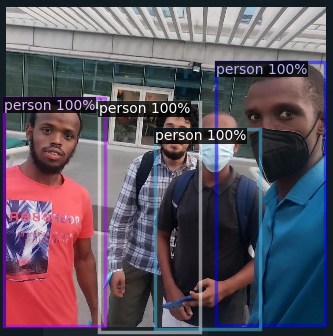

In [ ]:
from google.colab.patches import cv2_imshow
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
metadata = MetadataCatalog.get(cfg.DATASETS.TRAIN[0])
v = Visualizer(img[:, :, ::-1], metadata, scale=0.5)
instances = output["instances"].to("cpu")
annotated_img = v.draw_instance_predictions(instances)
cv2_imshow(annotated_img.get_image()[:, :, ::-1])